In [163]:
# 시도별 전출입 인구수 
# 1970~2017년 이동 인구수
# 대구 --> 타지역으로 이동 인구수 분석
# 시각화하기 대구중심
# 어느지역이 가장많이 이동했었나 비교
import pandas as pd
import matplotlib.pyplot as plt
import df_dfutil as util
from matplotlib import font_manager as fm
from matplotlib import rc
import numpy as np


In [164]:
# 데이터 준비하기
FILEDATA=r'C:\Users\KDP-26\Documents\datafolder\시도별 전출입 인구수.xlsx'
datadf=pd.read_excel(FILEDATA)

In [165]:
datadf

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,NaN,NaN,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,NaN,전라북도,139,202,141,210,219,415,392,408,...,668,579,672,561,551,516,609,683,733,768
321,NaN,전라남도,631,965,857,952,1133,2808,2608,2652,...,1143,1123,1002,1026,966,1001,928,1062,1127,1102
322,NaN,경상북도,374,619,468,576,625,1123,1141,1004,...,761,704,738,756,699,781,728,903,931,994
323,NaN,경상남도,474,479,440,571,1208,1517,863,1122,...,1517,1474,1324,1367,1227,1278,1223,1500,1448,1501


In [166]:
datadf.info()
print(datadf.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   전출지별    18 non-null     object
 1   전입지별    324 non-null    object
 2   1970    325 non-null    object
 3   1971    325 non-null    object
 4   1972    325 non-null    object
 5   1973    325 non-null    object
 6   1974    325 non-null    object
 7   1975    325 non-null    object
 8   1976    325 non-null    object
 9   1977    325 non-null    object
 10  1978    325 non-null    object
 11  1979    325 non-null    object
 12  1980    325 non-null    object
 13  1981    325 non-null    object
 14  1982    325 non-null    object
 15  1983    325 non-null    object
 16  1984    322 non-null    object
 17  1985    322 non-null    object
 18  1986    322 non-null    object
 19  1987    325 non-null    object
 20  1988    325 non-null    object
 21  1989    325 non-null    object
 22  1990    325 non-null    ob

In [167]:
# 1) NaN컬럼에 대한 처리하기
datadf.columns[0]

'전출지별'

In [168]:
datadf[datadf.columns[0]].ffill(inplace=True)

for a in datadf.index:
    for b in datadf.columns:
        if datadf.iloc[a][b]=='-':
            datadf.iloc[a][b]=0
datadf
# # '-'를 NaN으로 변경 후 결측치 개수 확인
# datadf.replace('-', np.NaN, inplace = True)
# datadf.isna().sum()
# # 결측치를 모두 0으로 채우기
# datadf.fillna(0, inplace = True)
# df

C:\Users\KDP-26\AppData\Local\Temp\ipykernel_1752\84236819.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datadf[datadf.columns[0]].ffill(inplace=True)
C:\Users\KDP-26\AppData\Local\Temp\ipykernel_1752\84236819.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Se

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,NaN,NaN,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,전국,대구광역시,0,0,0,0,0,0,0,0,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,제주특별자치도,전라북도,139,202,141,210,219,415,392,408,...,668,579,672,561,551,516,609,683,733,768
321,제주특별자치도,전라남도,631,965,857,952,1133,2808,2608,2652,...,1143,1123,1002,1026,966,1001,928,1062,1127,1102
322,제주특별자치도,경상북도,374,619,468,576,625,1123,1141,1004,...,761,704,738,756,699,781,728,903,931,994
323,제주특별자치도,경상남도,474,479,440,571,1208,1517,863,1122,...,1517,1474,1324,1367,1227,1278,1223,1500,1448,1501


In [169]:
datadf.describe()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
count,324,324,325,325,325,325,325,325,325,325,...,325,325,325,325,325,325,325,325,325,325
unique,18,18,146,146,146,146,145,146,146,146,...,289,289,289,291,323,320,321,324,322,323
top,전국,전국,0,0,0,0,0,0,0,0,...,0,0,0,0,1489,1939,2026,1468,4303,947
freq,18,18,180,180,180,180,180,180,180,180,...,35,35,35,35,2,2,2,2,2,2


In [170]:
# NaN 행 제거
datadf=datadf.dropna()

In [171]:
datadf.duplicated()

1      False
2      False
3      False
4      False
5      False
       ...  
320    False
321    False
322    False
323    False
324    False
Length: 321, dtype: bool

In [172]:
datadf.value_counts()

전출지별     전입지별     1970    1971    1972    1973    1974    1975    1976    1977    1978    1979    1980    1981    1982    1983    1984    1985    1986    1987    1988    1989    1990    1991    1992    1993    1994    1995    1996    1997    1998    1999    2000    2001    2002    2003    2004    2005    2006    2007    2008    2009    2010    2011    2012    2013    2014    2015    2016    2017  
강원도      강원도      113485  128222  112559  180716  130356  212434  154239  162520  170661  151052  186495  175961  179155  205866  185322  174284  174443  175327  172443  173953  167644  173466  161850  159416  163492  184202  158515  168235  171176  183780  171050  169491  182229  181717  167246  165077  170234  158066  161854  158826  153165  147142  140649  136041  145250  140018  140921  130963    1
세종특별자치시  경상남도     0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0      

In [173]:
# 대구광역시 추출
daegu=datadf[datadf['전출지별'] == '대구광역시']
daegu

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
55,대구광역시,전국,0,0,0,0,0,0,0,0,...,422676,411288,382657,383310,359206,363224,365739,364364,337488,333118
56,대구광역시,서울특별시,0,0,0,0,0,0,0,0,...,14824,15469,13915,13310,13838,13673,13735,13038,12802,13011
57,대구광역시,부산광역시,0,0,0,0,0,0,0,0,...,5066,5207,5050,4906,5216,5543,6157,5182,4860,4840
58,대구광역시,대구광역시,0,0,0,0,0,0,0,0,...,311113,298755,274649,276495,254661,258107,252642,259185,240722,236143
59,대구광역시,인천광역시,0,0,0,0,0,0,0,0,...,2125,2003,1968,2000,1979,2202,2015,1987,1962,1930
60,대구광역시,광주광역시,0,0,0,0,0,0,0,0,...,563,624,527,577,711,622,902,629,547,515
61,대구광역시,대전광역시,0,0,0,0,0,0,0,0,...,2106,2057,1956,2063,2144,2219,2254,2085,1949,1978
62,대구광역시,울산광역시,0,0,0,0,0,0,0,0,...,4283,3740,3551,3586,3844,3833,3835,3675,3266,2604
63,대구광역시,세종특별자치시,0,0,0,0,0,0,0,0,...,0,0,0,0,261,233,526,879,642,827
64,대구광역시,경기도,0,0,0,0,0,0,0,0,...,13724,14534,14596,13320,13581,13659,12813,12322,11918,12354


In [174]:
# 전출지별과 전입지별 모두 멀티인덱스로 만들어주기
daegu.columns[:2].to_list()
daegu.set_index(daegu.columns[:2].to_list(), inplace=True)
daegu

1970 1971 1972 1973 1974 1975 1976 1977 1978 1979  ...    2008  \
전출지별  전입지별                                                       ...           
대구광역시 전국         0    0    0    0    0    0    0    0    0    0  ...  422676   
      서울특별시      0    0    0    0    0    0    0    0    0    0  ...   14824   
      부산광역시      0    0    0    0    0    0    0    0    0    0  ...    5066   
      대구광역시      0    0    0    0    0    0    0    0    0    0  ...  311113   
      인천광역시      0    0    0    0    0    0    0    0    0    0  ...    2125   
      광주광역시      0    0    0    0    0    0    0    0    0    0  ...     563   
      대전광역시      0    0    0    0    0    0    0    0    0    0  ...    2106   
      울산광역시      0    0    0    0    0    0    0    0    0    0  ...    4283   
      세종특별자치시    0    0    0    0    0    0    0    0    0    0  ...       0   
      경기도        0    0    0    0    0    0    0    0    0    0  ...   13724   
      강원도        0    0    0    0    0    0    0    0    0    0  ...    1996   
      충청북도       0    0    0    0    0    0    0    0    0    0  ...    1762   
      충청남도       0    0    0    0    0    0    0    0    0    0  ...    2717   
      전라북도       0    0    0    0    0    0    0    0    0    0  ...     970   
      전라남도       0    0    0    0    0    0    0    0    0    0  ...     904   
      경상북도       0    0    0    0    0    0    0    0    0    0  ...   48562   
      경상남도       0    0    0    0    0    0    0    0    0    0  ...   11343   
      제주특별자치도    0    0    0    0    0    0    0    0    0    0  ...     618   

                 2009    2010    2011    2012    2013    2014    2015    2016  \
전출지별  전입지별                                                                      
대구광역시 전국       411288  382657  383310  359206  363224  365739  364364  337488   
      서울특별시     15469   13915   13310   13838   13673   13735   13038   12802   
      부산광역시      5207    5050    4906    5216    5543    6157    5182    4860   
      대구광역시    298755  274649  276495  254661  258107  252642  259185  240722   
      인천광역시      2003    1968    2000    1979    2202    2015    1987    1962   
      광주광역시       624     527     577     711     622     902     629     547   
      대전광역시      2057    1956    2063    2144    2219    2254    2085    1949   
      울산광역시      3740    3551    3586    3844    3833    3835    3675    3266   
      세종특별자치시       0       0       0     261     233     526     879     642   
      경기도       14534   14596   13320   13581   13659   12813   12322   11918   
      강원도        1942    2039    1843    1807    1820    1884    1884    1748   
      충청북도       1880    1784    1849    1943    1958    2026    1957    1771   
      충청남도       2579    2730    2647    2706    2599    2682    2509    2323   
      전라북도        935     860    1003     878     985     996     940     920   
      전라남도       1012     985     947     977     948     985     953     907   
      경상북도      49288   47895   49300   44922   45035   51852   46900   41444   
      경상남도      10599    9521    8821    8965    8941    9374    8922    8313   
      제주특별자치도     664     631     643     773     847    1061    1317    1394   

                 2017  
전출지별  전입지별             
대구광역시 전국       333118  
      서울특별시     13011  
      부산광역시      4840  
      대구광역시    236143  
      인천광역시      1930  
      광주광역시       515  
      대전광역시      1978  
      울산광역시      2604  
      세종특별자치시     827  
      경기도       12354  
      강원도        1657  
      충청북도       1824  
      충청남도       2578  
      전라북도        911  
      전라남도        897  
      경상북도      41714  
      경상남도       7704  
      제주특별자치도    1631  

[18 rows x 48 columns]

In [175]:
daegu=daegu.astype('int64')
daegu.dtypes

1970    int64
1971    int64
1972    int64
1973    int64
1974    int64
1975    int64
1976    int64
1977    int64
1978    int64
1979    int64
1980    int64
1981    int64
1982    int64
1983    int64
1984    int64
1985    int64
1986    int64
1987    int64
1988    int64
1989    int64
1990    int64
1991    int64
1992    int64
1993    int64
1994    int64
1995    int64
1996    int64
1997    int64
1998    int64
1999    int64
2000    int64
2001    int64
2002    int64
2003    int64
2004    int64
2005    int64
2006    int64
2007    int64
2008    int64
2009    int64
2010    int64
2011    int64
2012    int64
2013    int64
2014    int64
2015    int64
2016    int64
2017    int64
dtype: object

In [176]:
import df_dfutil as ut

In [177]:
ut.kor_font(r'C:\Windows\Fonts\H2MJRE.TTF')

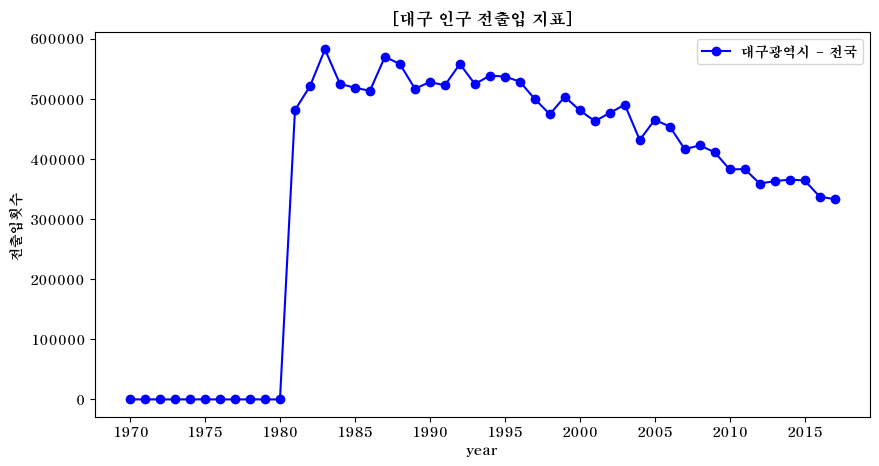

In [184]:
# def drawlinegrape(title, columns, labels, xlabel, ylabel): # 타이틀, 열이름, 라벨로 사용할 열이름, 엑스라벨쓸 이름, 와이라벨쓸이름
#     for col in columns:
#         plt.plot(datadf.loc[col], label=f'{col}')
    
#     plt.title(f'---[{title}]---' )
#     plt.ylabel(xlabel)
#     plt.xlabel(ylabel)
#     plt.legend(labels)
#     plt.show()


plt.figure(figsize=[10,5])
plt.plot(daegu.loc[('대구광역시', '전국')],'bo-', label='대구광역시 - 전국')
plt.title('[대구 인구 전출입 지표]', )
plt.ylabel('전출입횟수')
plt.xlabel('year')
plt.xticks(np.arange(0, 47, 5), ['1970', '1975', '1980', '1985', '1990', '1995', '2000', '2005', '2010', '2015'])
plt.legend()
plt.show()


In [179]:
# 서울특별시 추출
seoul=datadf[datadf['전출지별'] == '서울특별시']
seoul

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
19,서울특별시,전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
20,서울특별시,서울특별시,1232619,1158556,985945,1345508,1511726,2401970,2041724,2212213,...,1426213,1286855,1199708,1215122,1069300,1053008,1098023,1129529,1061915,1018807
21,서울특별시,부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
22,서울특별시,대구광역시,0,0,0,0,0,0,0,0,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
23,서울특별시,인천광역시,0,0,0,0,0,0,0,0,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
24,서울특별시,광주광역시,0,0,0,0,0,0,0,0,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
25,서울특별시,대전광역시,0,0,0,0,0,0,0,0,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
26,서울특별시,울산광역시,0,0,0,0,0,0,0,0,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
27,서울특별시,세종특별자치시,0,0,0,0,0,0,0,0,...,0,0,0,0,2998,2851,6481,7550,5943,5813
28,서울특별시,경기도,130149,150313,93333,143234,149045,253705,202276,207722,...,412408,398282,410735,373771,354135,340801,332785,359337,370760,342433


In [180]:
# 전출지별과 전입지별 모두 멀티인덱스로 만들어주기
seoul.columns[:2].to_list()
seoul.set_index(seoul.columns[:2].to_list(), inplace=True)
seoul

1970     1971     1972     1973     1974     1975     1976  \
전출지별  전입지별                                                                     
서울특별시 전국       1448985  1419016  1210559  1647268  1819660  2937093  2495620   
      서울특별시    1232619  1158556   985945  1345508  1511726  2401970  2041724   
      부산광역시      11568    11130    11768    16307    22220    27515    23732   
      대구광역시          0        0        0        0        0        0        0   
      인천광역시          0        0        0        0        0        0        0   
      광주광역시          0        0        0        0        0        0        0   
      대전광역시          0        0        0        0        0        0        0   
      울산광역시          0        0        0        0        0        0        0   
      세종특별자치시        0        0        0        0        0        0        0   
      경기도       130149   150313    93333   143234   149045   253705   202276   
      강원도         9352    12885    13561    16481    15479    27837    25927   
      충청북도        6700     9457    10853    12617    11786    21073    18029   
      충청남도       15954    18943    23406    27139    25509    51205    41447   
      전라북도       10814    13192    16583    18642    16647    34411    29835   
      전라남도       10513    16755    20157    22160    21314    46610    46251   

                  1977     1978     1979  ...     2008     2009     2010  \
전출지별  전입지별                                ...                              
서울특별시 전국       2678007  3028911  2441242  ...  2083352  1925452  1848038   
      서울특별시    2212213  2518286  1883742  ...  1426213  1286855  1199708   
      부산광역시      27213    29856    28542  ...    17353    17738    17418   
      대구광역시          0        0        0  ...     9720    10464    10277   
      인천광역시          0        0        0  ...    50493    45392    46082   
      광주광역시          0        0        0  ...    10846    11725    11095   
      대전광역시          0        0        0  ...    13515    13632    13819   
      울산광역시          0        0        0  ...     5057     4845     4742   
      세종특별자치시        0        0        0  ...        0        0        0   
      경기도       207722   237684   278411  ...   412408   398282   410735   
      강원도        25415    26700    27599  ...    23668    23331    22736   
      충청북도       17478    18420    20047  ...    15294    15295    15461   
      충청남도       43993    48091    45388  ...    27458    24889    24522   
      전라북도       28444    29676    31570  ...    18390    18332    17569   
      전라남도       43430    44624    47934  ...    16601    17468    16429   

                  2011     2012     2013     2014     2015     2016     2017  
전출지별  전입지별                                                                    
서울특별시 전국       1834806  1658928  1620640  1661425  1726687  1655859  1571423  
      서울특별시    1215122  1069300  1053008  1098023  1129529  1061915  1018807  
      부산광역시      18816    16135    16153    17320    17009    15062    14484  
      대구광역시      10397    10135    10631    10062    10191     9623     8891  
      인천광역시      51641    49640    47424    43212    44915    43745    40485  
      광주광역시      10587    10154     9129     9759     9216     8354     7932  
      대전광역시      13900    14080    13440    13403    13453    12619    11815  
      울산광역시       5188     5691     5542     6047     5950     5102     4260  
      세종특별자치시        0     2998     2851     6481     7550     5943     5813  
      경기도       373771   354135   340801   332785   359337   370760   342433  
      강원도        23624    22332    20601    21173    22659    21590    21016  
      충청북도       15318    14555    13783    14244    14379    14087    13302  
      충청남도       24723    22269    21486    21473    22299    21741    21020  
      전라북도       17755    16120    14909    14566    14835    13835    13179  
      전라남도       15974    14765    14187    14591    14598    13065    12426  

[15 rows x 48 column

In [181]:
seoul=seoul.astype('int64')
seoul.dtypes

1970    int64
1971    int64
1972    int64
1973    int64
1974    int64
1975    int64
1976    int64
1977    int64
1978    int64
1979    int64
1980    int64
1981    int64
1982    int64
1983    int64
1984    int64
1985    int64
1986    int64
1987    int64
1988    int64
1989    int64
1990    int64
1991    int64
1992    int64
1993    int64
1994    int64
1995    int64
1996    int64
1997    int64
1998    int64
1999    int64
2000    int64
2001    int64
2002    int64
2003    int64
2004    int64
2005    int64
2006    int64
2007    int64
2008    int64
2009    int64
2010    int64
2011    int64
2012    int64
2013    int64
2014    int64
2015    int64
2016    int64
2017    int64
dtype: object

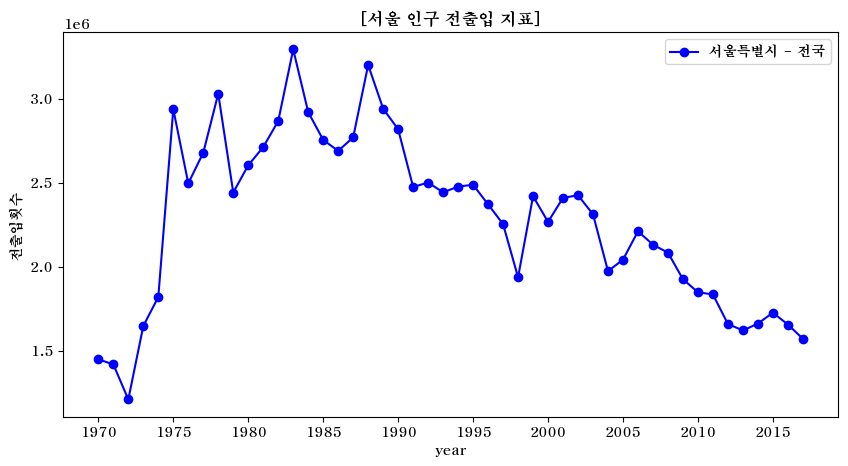

In [183]:

plt.figure(figsize=[10,5])
plt.plot(seoul.loc[('서울특별시', '전국')],'bo-', label='서울특별시 - 전국')
plt.title('[서울 인구 전출입 지표]', )
plt.ylabel('전출입횟수')
plt.xlabel('year')
plt.xticks(np.arange(0, 47, 5), ['1970', '1975', '1980', '1985', '1990', '1995', '2000', '2005', '2010', '2015'])
plt.legend()
plt.show()